<a href="https://colab.research.google.com/github/SaraKarim23/PART_4-RHESSI-Mission-Data-to-Identify-Solar-Flare/blob/main/PART_4_RHESSI_Mission_Data_to_Identify_Solar_Flare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting solar flare energy range from the given dataset**

**Data Preprocessing**

In [73]:
predicting_df = df.copy(deep=True)

predicting_df['dt.start'] = predicting_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
predicting_df['dt.peak'] = predicting_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
predicting_df['dt.end'] = predicting_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
# clean columns
predicting_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)
# add new columns
predicting_df['year'] = predicting_df['dt.start'].apply(lambda col: col.year)
predicting_df['month'] = predicting_df['dt.start'].apply(lambda col: col.month)
predicting_df['day'] = predicting_df['dt.start'].apply(lambda col: col.day)

In [74]:
# Display columns
predicting_df.columns

Index(['flare', 'duration.s', 'peak.c/s', 'total.counts', 'energy.kev',
       'x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar', 'flag.1',
       'flag.2', 'flag.3', 'flag.4', 'flag.5', 'duration_s_log', 'flare_log',
       'dt.start', 'dt.peak', 'dt.end', 'year', 'month', 'day'],
      dtype='object')

In [75]:
# Rename columns and display few rows
predicting_df = predicting_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})
predicting_df.head(3)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,...,flag_4,flag_5,duration_s_log,flare_log,date_start,date_peak,date_end,year,month,day
0,2021213,712,136,167304,12-25,592,-358,692,0,A1,...,NaN,NaN,6.568078,6.568078,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
1,2021228,288,7,9504,6-12,604,-341,694,9811,A1,...,Q1,NaN,5.662960,5.662960,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2,2021332,216,15,11448,6-12,-310,375,487,9825,A1,...,NaN,NaN,5.375278,5.375278,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [76]:
predicting_df = predicting_df.drop(['flag_1', 'flag_2', 'flag_3', 'flag_4', 'flag_5', 'date_start', 'date_peak', 'date_end'], axis=1)

In [77]:
# Checking null values
predicting_df.isnull().any()

flare               False
duration_s          False
peak_c_s            False
total_counts        False
energy_kev          False
x_pos_asec          False
y_pos_asec          False
radial              False
active_region_ar    False
duration_s_log      False
flare_log           False
year                False
month               False
day                 False
dtype: bool

In [78]:
# Viewing dataframe object details
predicting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flare             113942 non-null  int64  
 1   duration_s        113942 non-null  int64  
 2   peak_c_s          113942 non-null  int64  
 3   total_counts      113942 non-null  int64  
 4   energy_kev        113942 non-null  object 
 5   x_pos_asec        113942 non-null  int64  
 6   y_pos_asec        113942 non-null  int64  
 7   radial            113942 non-null  int64  
 8   active_region_ar  113942 non-null  int64  
 9   duration_s_log    113942 non-null  float64
 10  flare_log         113942 non-null  float64
 11  year              113942 non-null  int64  
 12  month             113942 non-null  int64  
 13  day               113942 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 12.2+ MB


In [79]:
# Enumerating energy range values from str to category
dt = predicting_df['energy_kev'].astype('category')
dict(enumerate((dt.cat.categories)))

{0: '100-300',
 1: '12-25',
 2: '25-50',
 3: '3-6',
 4: '300-800',
 5: '50-100',
 6: '6-12',
 7: '7000-20000',
 8: '800-7000'}

In [80]:
# Assigning the enumerated codes to ernegy column
predicting_df['energy_kev'] = dt.cat.codes

In [81]:
# Display dataset - Focus on the energy_kev column, the ranges have been converted to categorial values
predicting_df.head(5)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,duration_s_log,flare_log,year,month,day
0,2021213,712,136,167304,1,592,-358,692,0,6.568078,6.568078,2002,2,12
1,2021228,288,7,9504,6,604,-341,694,9811,5.662960,5.662960,2002,2,12
2,2021332,216,15,11448,6,-310,375,487,9825,5.375278,5.375278,2002,2,13
3,2021308,244,20,17400,1,-277,378,469,9822,5.497168,5.497168,2002,2,13
4,2021310,236,336,313392,2,-272,390,476,9825,5.463832,5.463832,2002,2,13


# **Creating train and test set for models**

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(predicting_df, test_size=0.2)

X_train.shape, X_test.shape

y_train = X_train['energy_kev']
X_train = X_train.drop(['energy_kev'], axis=1)

y_test = X_test['energy_kev']
X_test = X_test.drop(['energy_kev'], axis=1)



# **Predictions using Various models**

## **Using Linear Regression**

In [83]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_score = linear_regression.score(X_test, y_test)
linear_regression_score_train = linear_regression.score(X_train, y_train)
linear_regression_score, linear_regression_score_train

(0.2057584392867705, 0.192425133296784)

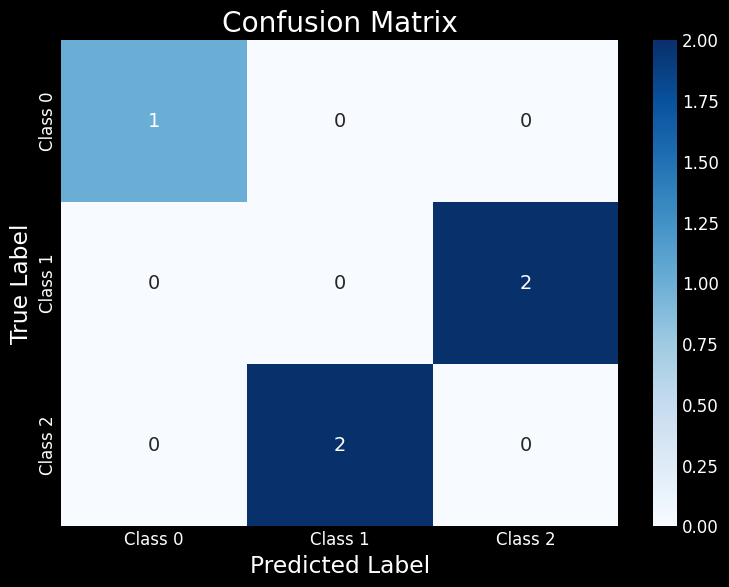

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate some random data for demonstration purposes
y_true = [0, 1, 2, 2, 1]
y_pred = [0, 2, 1, 1, 2]

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [98]:
# Calculate the accuracy score
accuracy = linear_regression.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.2057584392867705


# **Using Logistic regression**

In [100]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, y_test)
logistic_regression_score_train = logistic_regression.score(X_train, y_train)
logistic_regression_score, logistic_regression_score_train

(0.7746719908727895, 0.7731177251434401)

In [101]:
from sklearn import metrics
print ('\nReport on data set:')
print(metrics.classification_report(y_test, logistic_regression_predictions))
print(metrics.precision_recall_fscore_support(y_test, logistic_regression_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.56      0.26      0.35      3853
           2       0.23      0.01      0.02       416
           3       0.00      0.00      0.00      1268
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        94
           6       0.79      0.97      0.87     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.77     22789
   macro avg       0.18      0.14      0.14     22789
weighted avg       0.69      0.77      0.72     22789

(0.7746719908727895, 0.7746719908727895, 0.7746719908727895, None)


In [104]:
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7746719908727895


## **Using Decision Tree Classifier**

In [105]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_score = decision_tree_classifier.score(X_test, y_test)
decision_tree_score_train = decision_tree_classifier.score(X_train, y_train)
decision_tree_score, decision_tree_score_train

print ('\nReport on data set:')
print(metrics.classification_report(y_test, decision_tree_predictions))
print(metrics.precision_recall_fscore_support(y_test, decision_tree_predictions, average='micro'))




Report on data set:
              precision    recall  f1-score   support

           0       0.13      0.16      0.14        38
           1       0.50      0.53      0.51      3853
           2       0.12      0.12      0.12       416
           3       1.00      1.00      1.00      1268
           4       0.00      0.00      0.00         2
           5       0.14      0.11      0.12        94
           6       0.90      0.89      0.89     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.82     22789
   macro avg       0.31      0.31      0.31     22789
weighted avg       0.82      0.82      0.82     22789

(0.8160516038439598, 0.8160516038439598, 0.8160516038439599, None)


In [108]:
accuracy = decision_tree_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8160516038439598


## **Using Random Forests Classifier**

In [110]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_score = random_forest_classifier.score(X_test, y_test)
random_forest_score_train = random_forest_classifier.score(X_train, y_train)
random_forest_score, random_forest_score_train

(0.8757733994471016, 0.999978058868057)

In [111]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, random_forest_predictions))
print(metrics.precision_recall_fscore_support(y_test, random_forest_predictions, average='micro'))




Report on data set:
              precision    recall  f1-score   support

           0       0.50      0.11      0.17        38
           1       0.69      0.57      0.63      3853
           2       0.46      0.04      0.08       416
           3       1.00      1.00      1.00      1268
           4       0.00      0.00      0.00         2
           5       0.71      0.05      0.10        94
           6       0.90      0.96      0.93     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.88     22789
   macro avg       0.47      0.30      0.32     22789
weighted avg       0.86      0.88      0.86     22789

(0.8757733994471016, 0.8757733994471016, 0.8757733994471016, None)


In [112]:
accuracy = random_forest_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8757733994471016


## **Using K Nearest Neighbours**

In [113]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier().fit(X_train, y_train)
kneighbors_predictions = kneighbors_classifier.predict(X_test)
kneighbors_score = kneighbors_classifier.score(X_test, y_test)
kneighbors_score_train = kneighbors_classifier.score(X_train, y_train)
kneighbors_score, kneighbors_score_train

(0.7662468734915968, 0.824416091626167)

In [114]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, kneighbors_predictions))
print(metrics.precision_recall_fscore_support(y_test, kneighbors_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.20      0.11      0.14        38
           1       0.46      0.43      0.45      3853
           2       0.12      0.03      0.05       416
           3       0.49      0.27      0.35      1268
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        94
           6       0.84      0.90      0.87     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.77     22789
   macro avg       0.24      0.19      0.21     22789
weighted avg       0.74      0.77      0.75     22789

(0.7662468734915968, 0.7662468734915968, 0.7662468734915968, None)


In [115]:
accuracy = kneighbors_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7662468734915968


## **Using Gradient Boosting Classifier**

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier = GradientBoostingClassifier().fit(X_train, y_train)
gradient_classifier_predictions = gradient_classifier.predict(X_test)
gradient_classifier_score = gradient_classifier.score(X_test, y_test)
gradient_classifier_score_train = gradient_classifier.score(X_train, y_train)
gradient_classifier_score, gradient_classifier_score_train

(0.8712097941989556, 0.8734435509527937)

In [117]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, gradient_classifier_predictions))
print(metrics.precision_recall_fscore_support(y_test, gradient_classifier_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        38
           1       0.68      0.54      0.60      3853
           2       0.57      0.04      0.08       416
           3       1.00      1.00      1.00      1268
           4       0.00      0.00      0.00         2
           5       0.30      0.03      0.06        94
           6       0.89      0.96      0.93     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.87     22789
   macro avg       0.42      0.31      0.32     22789
weighted avg       0.86      0.87      0.86     22789

(0.8712097941989556, 0.8712097941989556, 0.8712097941989556, None)


In [118]:
accuracy = gradient_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8712097941989556


## **Using Neural Network (scikit-learn)**

In [119]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,10)).fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_score = mlp_classifier.score(X_test, y_test)
mlp_score_train = mlp_classifier.score(X_train, y_train)
mlp_score, mlp_score_train

(0.7510202290578788, 0.7523614143253651)

In [120]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, mlp_predictions))
print(metrics.precision_recall_fscore_support(y_test, mlp_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00      3853
           2       0.00      0.00      0.00       416
           3       0.00      0.00      0.00      1268
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        94
           6       0.75      1.00      0.86     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.75     22789
   macro avg       0.08      0.11      0.10     22789
weighted avg       0.56      0.75      0.64     22789

(0.7510202290578788, 0.7510202290578788, 0.7510202290578787, None)


In [121]:
accuracy = mlp_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7510202290578788


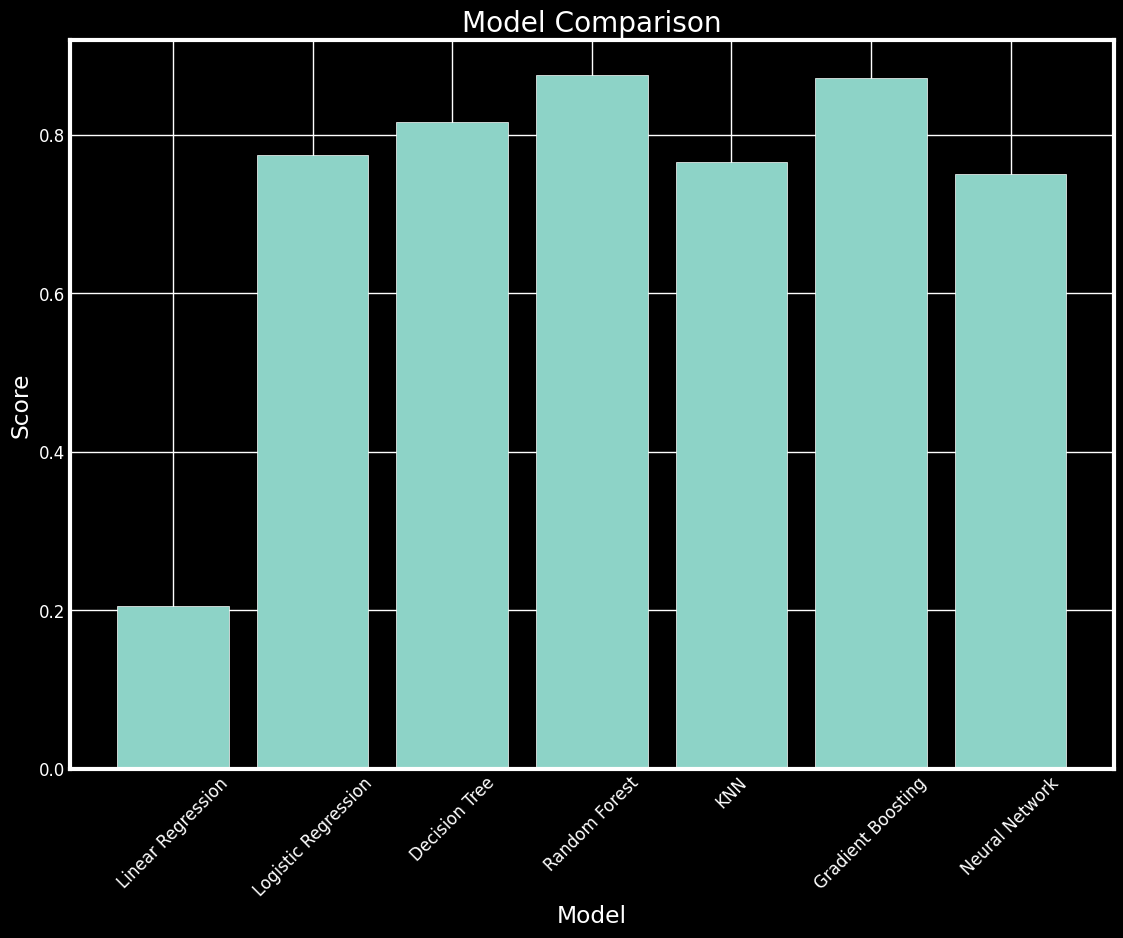

In [128]:

import matplotlib.pyplot as plt

# Create a list of model names and their corresponding scores
model_names = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'Neural Network']
model_scores = [linear_regression_score, logistic_regression_score, decision_tree_score, random_forest_score, kneighbors_score, gradient_classifier_score, mlp_score]

# Create a bar chart
plt.bar(model_names, model_scores)

# Add title and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
